# **Linear Discriminant Analysis**

## <u>DATA: The Complete Pokemon Dataset</u>


### Context

This dataset contains information on all 802 Pokemon from all Seven Generations of Pokemon. The information contained in this dataset include Base Stats, Performance against Other Types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc. The information was scraped from http://serebii.net/

### Content

* name: The English name of the Pokemon
* japanese_name: The Original Japanese name of the Pokemon
* pokedex_number: The entry number of the Pokemon in the National Pokedex
* percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
* type1: The Primary Type of the Pokemon
* type2: The Secondary Type of the Pokemon
* classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex
* height_m: Height of the Pokemon in metres
* weight_kg: The Weight of the Pokemon in kilograms
* capture_rate: Capture Rate of the Pokemon
* baseeggsteps: The number of steps required to hatch an egg of the Pokemon
* abilities: A stringified list of abilities that the Pokemon is capable of having
* experience_growth: The Experience Growth of the Pokemon
* base_happiness: Base Happiness of the Pokemon
* against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type
* hp: The Base HP of the Pokemon
* attack: The Base Attack of the Pokemon
* defense: The Base Defense of the Pokemon
* sp_attack: The Base Special Attack of the Pokemon
* sp_defense: The Base Special Defense of the Pokemon
* speed: The Base Speed of the Pokemon
* generation: The numbered generation which the Pokemon was first introduced
* is_legendary: Denotes if the Pokemon is legendary.

### Acknowledgements

The data was scraped from http://serebii.net/.

### Inspiration

With this dataset, one may answer the following questions:

- Is it possible to build a classifier to identify legendary Pokemon?
- How does height and weight of a Pokemon correlate with its various base stats?
- What factors influence the Experience Growth and Egg Steps? Are these quantities correlated?
- Which type is the strongest overall? Which is the weakest?
- Which type is the most likely to be a legendary Pokemon?
- Can you build a Pokemon dream team? A team of 6 Pokemon that inflicts the most damage while remaining relatively impervious to any other team of 6 Pokemon.

These classifiers are attractive because they have closed-form solutions that can be easily computed, are inherently multiclass, have proven to work well in practice, and have no hyperparameters to tune.

In [1]:
from scipy import linalg

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
df = pd.read_csv(filepath_or_buffer="pokemon.csv")

In [3]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [5]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [6]:
df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [7]:
new_df = df.loc[df['type2'].isnull(),:]
new_df = new_df[list(new_df.columns[(new_df.dtypes == 'float64') | (new_df.dtypes == 'int64')]) + ['type1']]
new_df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,type1
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,...,39,88.1,4,60,50,65,8.5,1,0,fire
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,...,58,88.1,5,80,65,80,19.0,1,0,fire
6,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,...,44,88.1,7,50,64,43,9.0,1,0,water
7,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,...,59,88.1,8,65,80,58,22.5,1,0,water
8,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,...,79,88.1,9,135,115,78,85.5,1,0,water


In [8]:
new_df.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'defense', 'experience_growth',
       'height_m', 'hp', 'percentage_male', 'pokedex_number', 'sp_attack',
       'sp_defense', 'speed', 'weight_kg', 'generation', 'is_legendary',
       'type1'],
      dtype='object')

In [9]:
X = new_df.iloc[:,:-1].values
y = new_df.iloc[:,-1].values
X.shape, y.shape

((384, 34), (384,))

In [10]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X = imp.transform(X)

In [11]:
from sklearn.preprocessing import normalize
X_normalized = normalize(X)

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(X_normalized, y)

LinearDiscriminantAnalysis(n_components=3)

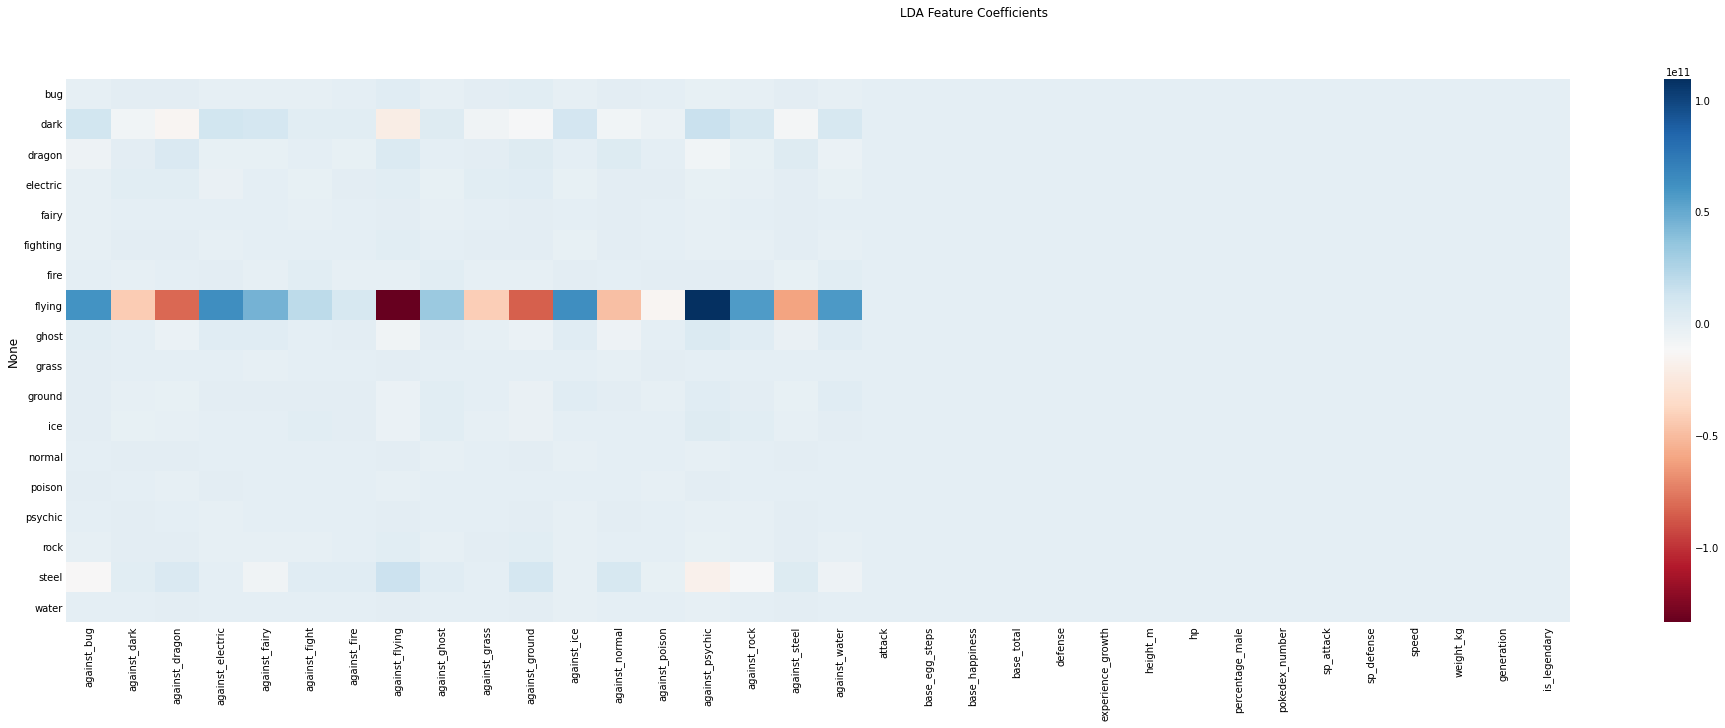

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

sns.heatmap(pd.DataFrame(lda.coef_, 
                         columns=new_df.columns[:-1], 
                         index=[lda.classes_]), 
            ax=ax, cmap='RdBu', annot=False)
plt.suptitle('LDA Feature Coefficients')
pass

In this heatmap we see classes which are probably easier to separate, given their large variable coefficients, as well as classes which are probably much harder. We can summarize this heatmap by looking at the absolute coefficient totals for each of the classes.

<AxesSubplot:title={'center':'LDA Class Coefficient Sums'}>

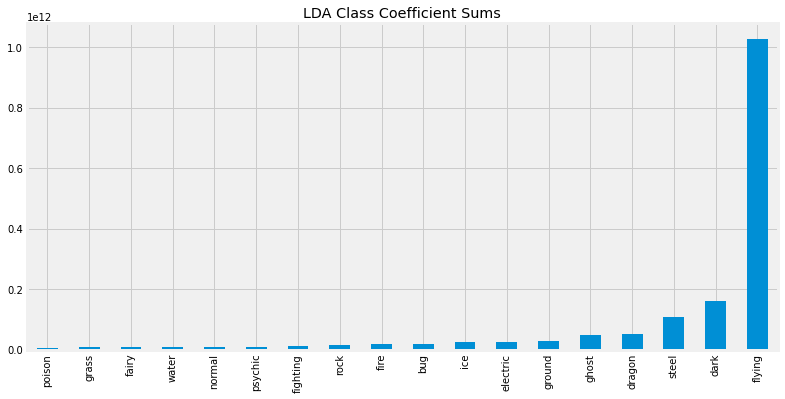

In [14]:
pd.Series(np.abs(lda.coef_).sum(axis=1), index=lda.classes_).sort_values().plot.bar(
    figsize=(12, 6), title="LDA Class Coefficient Sums"
)

In [15]:
lda.explained_variance_ratio_

array([0.30450342, 0.10375903, 0.09596681])

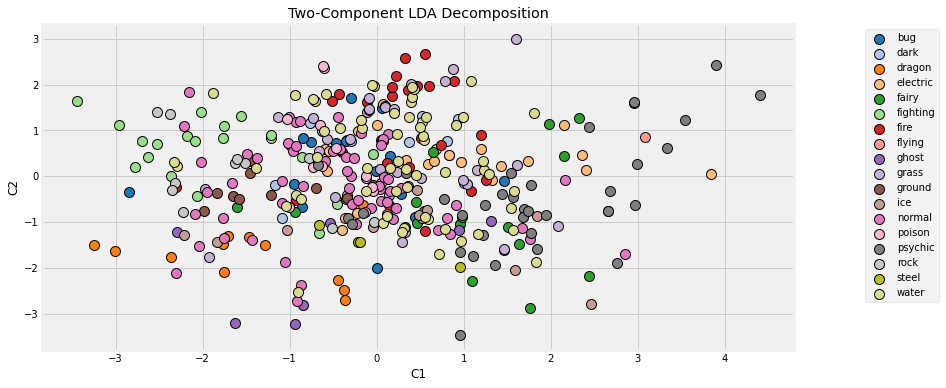

In [16]:
X_hat = lda.fit_transform(X, y)

import matplotlib as mpl

colors = mpl.cm.get_cmap(name='tab20').colors
categories = pd.Categorical(pd.Series(y)).categories
ret = pd.DataFrame(
    {'C1': X_hat[:, 0], 'C2': X_hat[:, 1], 'Type': pd.Categorical(pd.Series(y))}
)

fig, ax = plt.subplots(1, figsize=(12, 6))

for col, cat in zip(colors, categories):
    (ret
         .query('Type == @cat')
         .plot.scatter(x='C1', y='C2', color=col, label=cat, ax=ax,
                       s=100, edgecolor='black', linewidth=1,
                       title='Two-Component LDA Decomposition')
         .legend(bbox_to_anchor=(1.2, 1))
    )